In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
def da(a,b):
    return a*b - b*2

def db(a,b):
    return a/b + b*2

a0 = np.asarray([2,3,4])
b0 = np.asarray([0.2,0.1,-0.1])
a = [a0]
b = [b0]
dt = 0.01
tlist = np.linspace(0,10,int(10/dt))

for t in tlist:
    a1 = a[-1] + da(a0,b0)
    b1 = b[-1] + db(a0,b0)
    a.append(a1)
    b.append(b1)

In [6]:
## Chatgpt suggests:
import numpy as np
from scipy.integrate import solve_ivp

def da(t, ab):
    a, b = ab
    return a*b + b

def db(t, ab):
    a, b = ab
    return a/b - b*2

a0 = [2,3,4]
b0 = [0.2,0.1,-0.1]
ab0 = [a0, b0]
t_span = [0, 3.9]
tlist = np.linspace(0,.5,1000)
dt = .5/1000
start = time.time()
sol = solve_ivp(lambda t, ab: [da(t, ab), db(t, ab)], t_span, ab0, method='BDF', rtol=1e-6, atol=1e-9)
end = time.time()
print(np.size(sol.t), end-start)
a = sol.y[0]
b = sol.y[1]

print("The values of a and b at t=5 are:", a[-1], b[-1])


ValueError: `y0` must be 1-dimensional.

In [56]:
print(a)

[0.2        0.20294479 0.21909083 0.23571608 0.25290686 0.27074158
 0.28929256 0.30862758 0.33335663 0.35946155 0.38705565 0.42322992]


In [48]:
print(b)

[3.00000000e-01 2.90758214e-01 2.64756608e-01 2.47235680e-01
 2.29595196e-01 2.11721958e-01 1.99736100e-01 1.87528163e-01
 1.75026202e-01 1.62135554e-01 1.53784048e-01 1.45187183e-01
 1.36291190e-01 1.27025466e-01 1.19743304e-01 1.12142598e-01
 1.04149681e-01 9.93010801e-02 9.42609371e-02 8.89958148e-02
 8.34621818e-02 7.95634070e-02 7.54942318e-02 7.12251044e-02
 6.67172714e-02 6.31589928e-02 5.94088596e-02 5.54277428e-02
 5.29584638e-02 5.03766162e-02 4.76638600e-02 4.47963642e-02
 4.27638427e-02 4.06343522e-02 3.83917391e-02 3.60148545e-02
 3.41280900e-02 3.21339232e-02 3.00109389e-02 2.86874453e-02
 2.73011607e-02 2.58419784e-02 2.42967644e-02 2.31998541e-02
 2.20491602e-02 2.08357720e-02 1.95480167e-02 1.85245093e-02
 1.74415494e-02 1.62872814e-02 1.55677594e-02 1.48135359e-02
 1.40190109e-02 1.31768962e-02 1.25792609e-02 1.19518940e-02
 1.12898399e-02 1.05865927e-02 1.00277764e-02 9.43600500e-03
 8.80463619e-03 8.41222665e-03 8.00062649e-03 7.56670464e-03
 7.10637331e-03 6.780144

In [49]:
np.size(sol.t)
np.size(a)

168

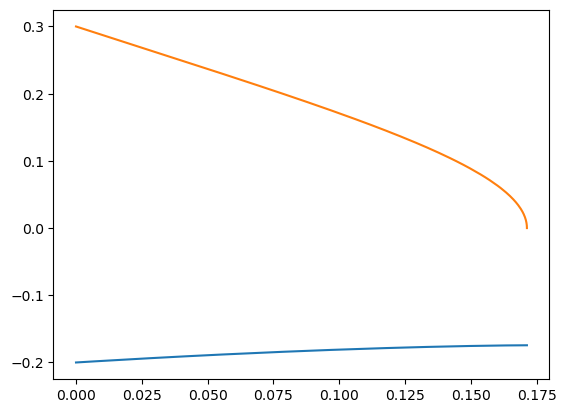

In [53]:
plt.plot(sol.t, a)
plt.plot(sol.t, b)

In [4]:
def bdf(f, y0, t0, tf, hmin, hmax, atol, rtol):
    """
    Solves an ordinary differential equation using the adaptive BDF method.
    
    Parameters:
    f: the function defining the ODE dy/dt = f(t, y)
    y0: the initial condition for y at t=t0
    t0: the initial time
    tf: the final time
    hmin: the minimum step size
    hmax: the maximum step size
    atol: the absolute tolerance
    rtol: the relative tolerance
    
    Returns:
    t: the array of times at which the solution was computed
    y: the array of solution values at the corresponding times
    """
    
    # Set initial values
    t = [t0]
    y = [y0]
    h = hmax
    k = 0
    
    # Define the BDF coefficients
    bdf_coefs = [
        [1],
        [-1/2, 3/2],
        [-1/3, 4/3, -1/3],
        [-1/4, 3/2, -3/4, 1/4],
        [-1/5, 5/4, -5/3, 5/6, -1/6],
        [-1/6, 15/16, -8/3, 25/12, -3/2, 1/3],
    ]
    
    # Define the order of the method
    p = len(bdf_coefs) - 1
    
    # Define the error scaling factor
    fac = 0.8
    
    # Define the maximum number of iterations
    max_iter = 10
    
    # Define the loop to compute the solution
    while t[k] < tf:
        # Compute the time step h
        if t[k] + h > tf:
            h = tf - t[k]
        elif t[k] + 2*h > tf:
            h = (tf - t[k])/2
            
        # Compute the predictor using the previous step and the BDF coefficients
        if k < p:
            # Use the forward Euler method for the first p steps
            y_pred = y[k] + h*f(t[k], y[k])
        else:
            # Use the BDF formula to compute the predictor
            y_pred = sum(bdf_coefs[-1][i]*y[k-i] for i in range(p+1))
            y_pred += h*sum(bdf_coefs[-1][i+1]*f(t[k-i], y[k-i]) for i in range(p))
        
        # Define the loop to compute the corrector
        for i in range(max_iter):
            # Compute the corrector using the BDF formula
            y_corr = sum(bdf_coefs[-1][i]*y[k-i] for i in range(p+1))
            y_corr += h*sum(bdf_coefs[-1][i+1]*f(t[k-i], y[k-i]) for i in range(p))
            
            # Compute the error estimate
            err = abs(y_corr - y_pred)
            err_scale = atol + rtol*max(abs(y_corr), abs(y_pred))
            err_norm = max(1e-6, abs(err/err_scale))


IndexError: list index out of range

In [22]:
A = [0, 1/4, 3/8, 12/13, 1, 1/2]

B = np.asarray([[],
     [1/4],
     [3/32, 9/32],
     [1932/2197, -7200/2197, 7296/2197],
     [439/216, -8, 3680/513, -845/4104],
     [-8/27, 2, -3544/2565, 1859/4104, -11/40]])
C = [25/216, 0, 1408/2565, 2197/4104, -1/5, 0]
CH = [16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55]
CT = [1/360, 0, -128/4275, -2197/75240, 1/50, 2/55]

C:\Users\Admin\AppData\Local\Temp\ipykernel_7320\2244461038.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  B = np.asarray([[],


In [62]:
B[4][1]

-8

In [56]:
def fun(t,y):
    return y**2-2

h = 0.5
k = [1]
t0 = 0
y0 = np.linspace(0,2,9).reshape(3,3)
k = []
for i in range(6):
    ki = h*fun(t0, y0 + h*np.dot(B[i], k[:i]))
    k.append(ki)
    print("ki", ki)
    print("k", k)



ki [[-1.      -0.96875 -0.875  ]
 [-0.71875 -0.5     -0.21875]
 [ 0.125    0.53125  1.     ]]
k [array([[-1.     , -0.96875, -0.875  ],
       [-0.71875, -0.5    , -0.21875],
       [ 0.125  ,  0.53125,  1.     ]])]


ValueError: shapes (1,) and (1,3,3) not aligned: 1 (dim 0) != 3 (dim 1)

In [113]:
def RK45(fun, t0, y0, h):
    """
    Returns the new stepsize and value
    Input:
    fun: function
    y0: current value
    """
    k1 = h * fun(t0 + A[0]*h, y0)
    k2 = h * fun(t0 + A[1]*h, y0 + B[1]*k1)
    k3 = h * fun(t0 + A[2]*h, y0 + B[2][0]*k1 + B[2][1]*k2)
    k4 = h * fun(t0 + A[3]*h, y0 + B[3][0]*k1 + B[3][1]*k2 + B[3][2]*k3)
    k5 = h * fun(t0 + A[4]*h, y0 + B[4][0]*k1 + B[4][1]*k2 + B[4][2]*k3 +B[4][3]*k4)
    k6 = h * fun(t0 + A[5]*h, y0 + B[5][0]*k1 + B[5][1]*k2 + B[5][2]*k3 +B[5][3]*k4
                 + B[5][4]*k5)
    k = np.asarray([k1,k2,k3,k4,k5,k6])
    y1 = y0 + sum([CH[i]*k[i] for i in range(6)])
    TE = np.abs(sum([CT[i]*k[i] for i in range(6)])).max()
    print(TE)
    
    fac = 0.9
    min_step = 1e-6
    max_step = 1e-2
    tol = 1e-4

    h_new = min(max_step, max(min_step, h * fac * (tol/TE)**0.2))
    if TE > tol:
        print("Not precise enough")
        return RK45(fun, t0, y0, h_new)
    else:
        return y1, h_new

RK45(fun, t0, y0, 0.001)

5.230326805341634e-16


(array([[-1.99999867e-03,  2.48062017e-01,  4.98249126e-01],
        [ 7.48561422e-01,  9.98999000e-01,  1.24956195e+00],
        [ 1.50025038e+00,  1.75106436e+00,  2.00200401e+00]]),
 0.01)

In [77]:
np.linalg.det(np.abs(y0))

0.0

In [82]:
max(y0.any)

TypeError: 'builtin_function_or_method' object is not iterable